In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [5]:
data = pd.DataFrame(data, label, columns=columns)

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
# k-Means

# Data Pre-Processing

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [8]:
data.shape # 13D data... need to reduce the dimention

(178, 13)

In [9]:
# PCA (Reduce Dimention)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # change from 13D -> 2D
data = pca.fit_transform(data)


In [10]:
data

array([[-7.06335756e-01, -2.53192753e-01],
       [-4.84976802e-01, -8.82289142e-03],
       [-5.21172266e-01, -1.89187222e-01],
       [-8.21643663e-01, -5.80905512e-01],
       [-2.02546382e-01, -5.94665740e-02],
       [-6.08190152e-01, -4.87519191e-01],
       [-5.44047399e-01, -3.00196497e-01],
       [-4.74357495e-01, -2.98197021e-01],
       [-5.00432012e-01, -3.07602859e-01],
       [-6.27517969e-01, -2.06328233e-01],
       [-7.27467157e-01, -3.56512044e-01],
       [-3.74967744e-01, -2.25424535e-01],
       [-4.48188283e-01, -2.31938139e-01],
       [-6.26345329e-01, -3.55138677e-01],
       [-8.35717011e-01, -5.38047802e-01],
       [-4.71931568e-01, -3.37405385e-01],
       [-4.26990905e-01, -4.50842684e-01],
       [-3.66595704e-01, -3.15750341e-01],
       [-7.18788533e-01, -5.93881332e-01],
       [-4.58884986e-01, -1.75782240e-01],
       [-6.61852288e-01, -1.27831032e-01],
       [-2.67900032e-01,  9.81127565e-03],
       [-5.99782399e-01,  7.82494523e-04],
       [-4.

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) # need to determine the number of the cluster


In [12]:
km.fit(data)

KMeans(n_clusters=3)

In [13]:
cluster = km.predict(data)

In [14]:
type(cluster)

numpy.ndarray

In [15]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

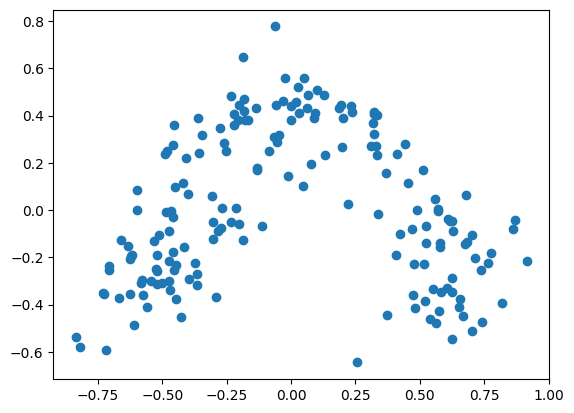

In [16]:
# Data Visualization
# From Wine Data(13D) -> transfer into 2D -> train with the transfered data -> visualization
plt.scatter(data[:,0],data[:,1]) 

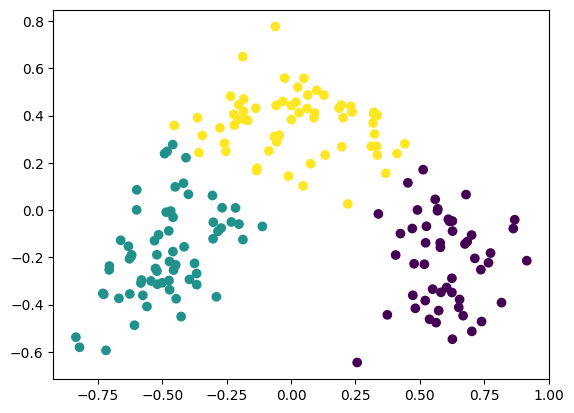

In [17]:
plt.scatter(data[:,0],data[:,1],c=cluster) # coloring according to cluster(trained) value

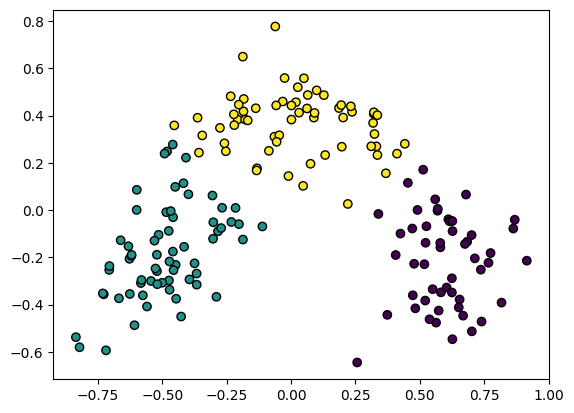

In [18]:
# Add more features to the graph
plt.scatter(data[:,0],data[:,1],c=cluster, edgecolor='black', linewidths=1)

In [19]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

In [20]:
single_clustering.fit(data)
complete_clustering.fit(data)
average_clustering.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [32]:
single_cluster = single_clustering.labels_
complete_cluster = complete_clustering.labels_
average_cluster = average_clustering.labels_

In [33]:
print(single_cluster)
print(complete_cluster)
print(average_cluster)
'''
From Data below, Single_Cluster shows only few 2 and 1
Which means that it did not train the data well...
So, It's better to use complete_cluster or average_cluster
'''

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 

"\nFrom Data below, Single_Cluster shows only few 2 and 1\nWhich means that it did not train the data well...\nSo, It's better to use complete_cluster or average_cluster\n"

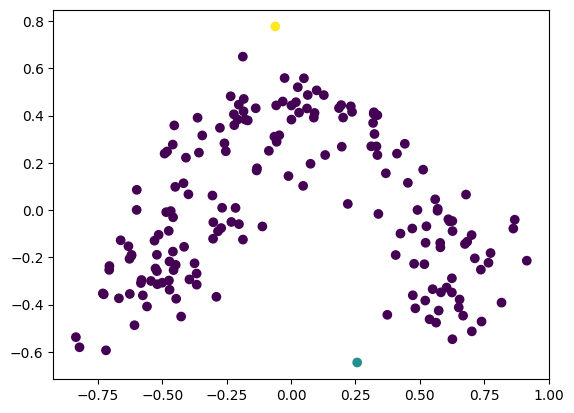

In [34]:
# Let's check the 3 clusters!!
# Visualization!

# Single Cluster Result
plt.scatter(data[:,0],data[:,1],c=single_cluster)

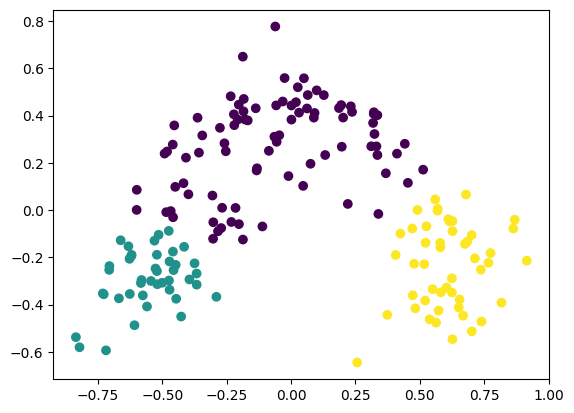

In [35]:
# Complete Cluster Result
plt.scatter(data[:,0],data[:,1],c=complete_cluster)

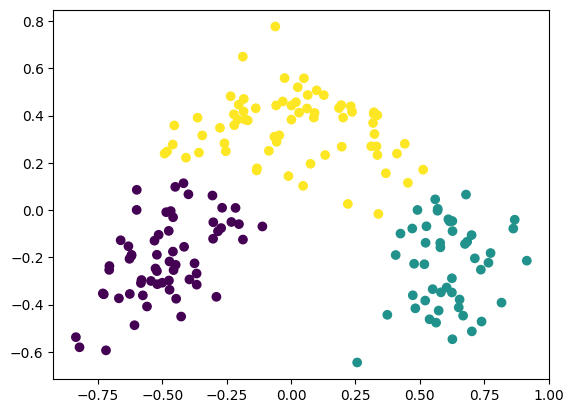

In [37]:
# Average Cluster Result
plt.scatter(data[:,0],data[:,1],c=average_cluster)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [32.5, 32.5, 55.0, 55.0],
  [43.75, 43.75, 65.0, 65.0],
  [10.0, 10.0, 54.375, 54.375],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [92.5, 92.5, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [132.5, 132.5, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [143.75, 143.75, 170.0, 170.0],
  [156.875, 156.875, 185.0, 185.0],
  [170.9375, 170.9375, 195.0, 195.0],
  [103.75, 103.75, 182.96875, 182.96875],
  [205.0, 205.0, 215.0, 215.0],
  [143.359375, 143.359375, 210.0, 210.0],
  [176.6796875, 176.6796875, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [200.83984375, 200.83984375, 250.0, 250.0],
  [75.0, 75.0, 225.419921875, 225.419921875],
  [275.0, 275.0, 285.0, 285.0],
  [280.0, 280.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [287.5, 287.5,

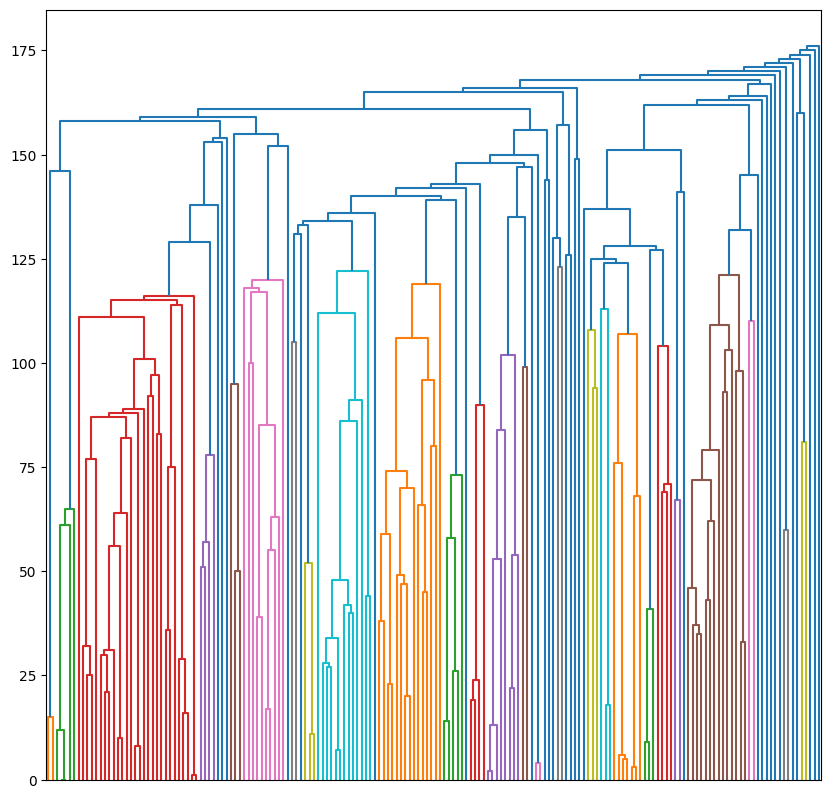

In [40]:
from scipy.cluster.hierarchy import dendrogram
'''
Usually hierachy dendrogram requires users to cut off from the certain weight
so that the datas are divided with right category
but in this case, Since we set up 'n_clusters=3'
It will automatically find the line where datas are divide into 3,
and set that point as a weight

'''



plt.figure(figsize=(10,10))
children = single_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2,children.shape[0]+2)
linkage_matrix = np.column_stack([children,distance,no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=single_cluster, show_contracted=True, no_labels=True)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [120.0, 120.0, 166.25, 166.25],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [195.0, 195.0, 220.0, 220.0],
  [143.125, 143.125, 207.5, 207.5],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [250.0, 250.0, 286.25, 286.25],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [322.5, 322.5, 352.5, 

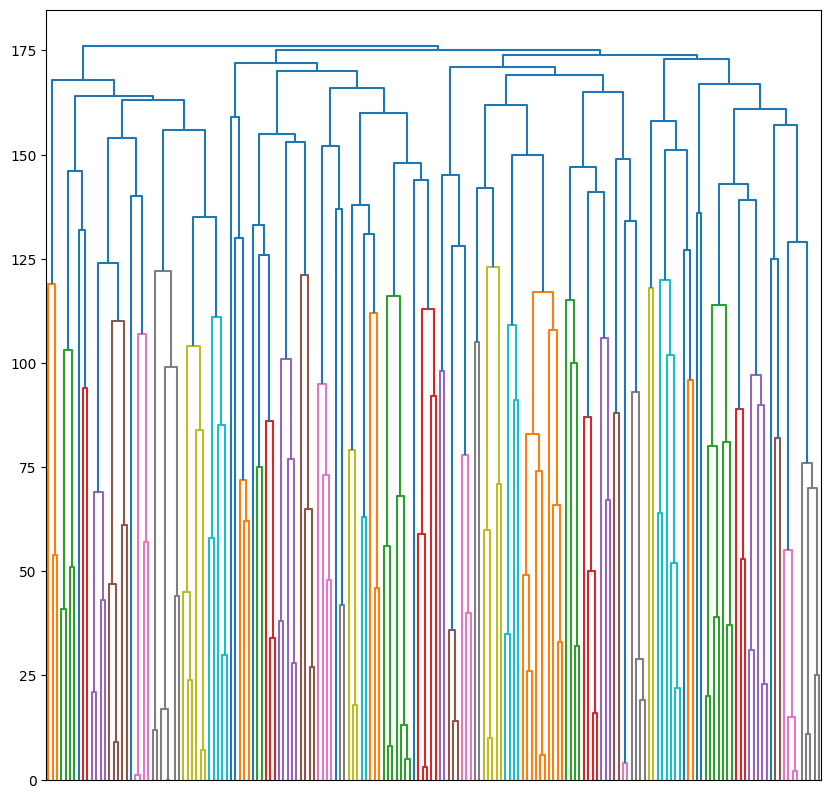

In [41]:

plt.figure(figsize=(10,10))
children = complete_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2,children.shape[0]+2)
linkage_matrix = np.column_stack([children,distance,no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=complete_cluster, show_contracted=True, no_labels=True)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [35.0, 35.0, 66.25, 66.25],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [95.0, 95.0, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [107.5, 107.5, 167.5, 167.5],
  [50.625, 50.625, 137.5, 137.5],
  [25.0, 25.0, 94.0625, 94.0625],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 4

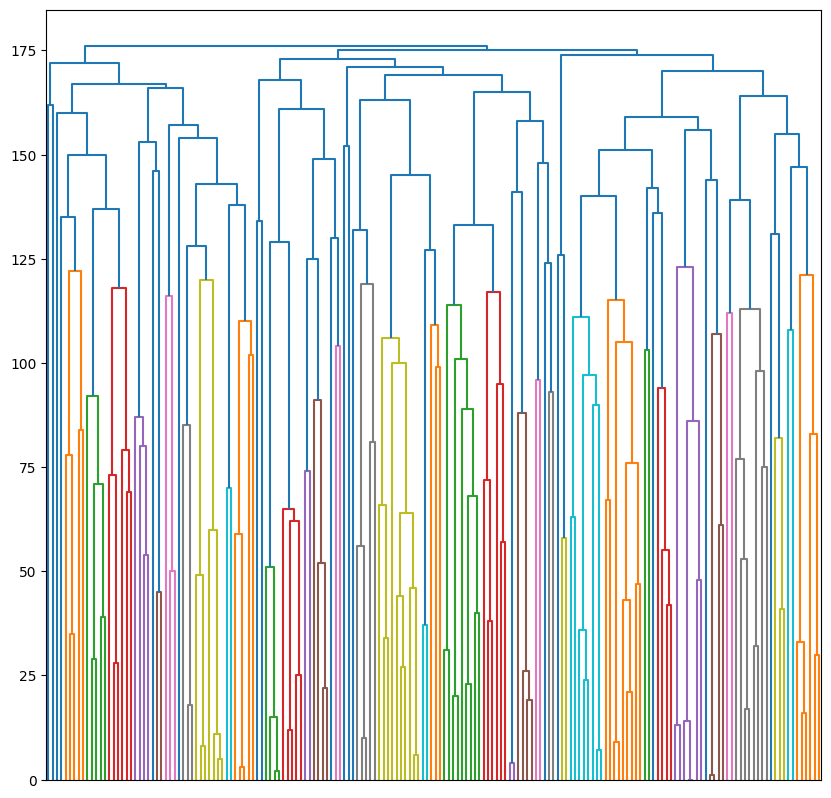

In [42]:
plt.figure(figsize=(10,10))
children = average_clustering.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2,children.shape[0]+2)
linkage_matrix = np.column_stack([children,distance,no_of_observations]).astype(float)

dendrogram(linkage_matrix, p=len(data), labels=average_cluster, show_contracted=True, no_labels=True)

In [43]:
# Silhouette

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1 # '1' is the best value

# check what number of cluster(n) makes the best score result
for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    if score>best_score:
        best_score = score
        best_n = n_cluster
        
print('Sillhouette Score: {:.2f}, Number of Cluster: {}'.format(best_score, best_n))        




Sillhouette Score: 0.57, Number of Cluster: 3


In [46]:
# Since Average_Cluster makes the best result 
# USE Average clustering with silhouette to see which n makes the best result
# Silhouette for average_clustering

from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1 # '1' is the best value

# check what number of cluster(n) makes the best score result
for n_cluster in range(2,15):
    average_clustering = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    average_clustering .fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)
    if score>best_score:
        best_score = score
        best_n = n_cluster
        
print('Sillhouette Score: {:.2f}, Number of Cluster: {}'.format(best_score, best_n))        

Sillhouette Score: 0.56, Number of Cluster: 3
